<a href="https://colab.research.google.com/github/ad9306/CSP/blob/main/n211a_simple_regression%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *AIB / SECTION 2 / SPRINT 1 / NOTE 1*

# 📝 Assignment
---

# Linear Regression

이번 모듈에서 사용한 데이터와 유사한 데이터를 사용해 복습해 보겠습니다. 이 데이터셋은 미국 시애틀 King County 지역에서 2014년 5월부터 ~ 2015년 5월 까지 주택 판매 가격 데이터입니다.

   - [House Sales in King County, USA](https://www.kaggle.com/harlfoxem/housesalesprediction?select=kc_house_data.csv)


이 데이터를 사용해 다음 과제를 마크다운과 코드를 사용해 진행해 주세요.


In [ ]:
# 데이터는 캐글에서 받으셔도 되고 이 링크에서 불러와도 됩니다.
import pandas as pd
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/kc_house_data/kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


### 1) 특성들과 타겟(Price)과의 상관계수를 계산하고 가장 상관관계가 높은 특성을 찾아 타겟과의 관계를 시각화하세요.
- **타겟과 상관관계가 가장 높은 특성의 이름을 과제 제출폼에 제출하세요.**

In [ ]:
### 이곳에서 과제를 진행해 주세요 ###
import numpy as np

corr = df.corr(method='pearson')
corr['price'] #자신(price)를 제외한 가장 상관관계가 높은 특성은 sqft_living로 0.702035이다.

id              -0.016762
price            1.000000
bedrooms         0.308350
bathrooms        0.525138
sqft_living      0.702035
sqft_lot         0.089661
floors           0.256794
waterfront       0.266369
view             0.397293
condition        0.036362
grade            0.667434
sqft_above       0.605567
sqft_basement    0.323816
yr_built         0.054012
yr_renovated     0.126434
zipcode         -0.053203
lat              0.307003
long             0.021626
sqft_living15    0.585379
sqft_lot15       0.082447
Name: price, dtype: float64

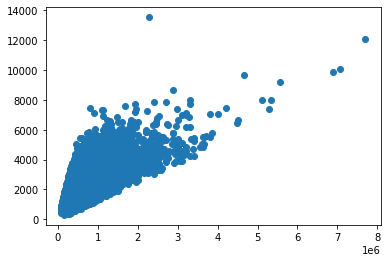

In [ ]:
#시각화
import matplotlib.pyplot as plt
plt.scatter(df['price'], df['sqft_living'])

### 2) sqft_living 와 price의 scatter plot을 그리고 기준모델을 시각화해 보세요.
- **기준모델의 값을 제출하세요. (소숫점 이하 반올림)**

540088.1417665294

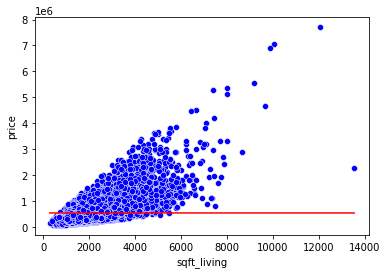

In [ ]:
### 이곳에서 과제를 진행해 주세요 ###
import seaborn as sns

x=df['sqft_living']
y=df['price']

predict = df['price'].mean()
errors = predict - df['price']
MAE = errors.abs().mean()

sns.lineplot(x=x, y=predict, color='red')
sns.scatterplot(x=x, y=y, color='blue')
predict

In [12]:
#기준모델 값
print(f'기준모델 값은 {round(predict)} 입니다.')

기준모델 값은 540088 입니다.


### 3) Scikit-Learn 라이브러리를 사용해 특성 sqft_living에 대한 선형회귀모델을 만들어 보세요.
- **sqft_living 값이 4000인 경우에 모델이 예측하는 주택 가격을 제출하세요.(소수점 이하 반올림)**

In [38]:
### 이곳에서 과제를 진행해 주세요 ###
#선형회귀모델 만들기
from sklearn.linear_model import LinearRegression

model = LinearRegression()

feature = ['sqft_living']
target = ['price']
x_train = df[feature]
y_train = df[target]

model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
#sqft_living 값이 4000인 경우에 모델이 예측하는 주택 가격을 제출
x_test = [[4000]]
y_pred = model.predict(x_test)

print(f'sqft_living 값 {x_test[0][0]} 을 가지는 주택의 예상 가격은 ${int(y_pred)} 입니다.')

sqft_living 값 4000 을 가지는 주택의 예상 가격은 $1078913 입니다.


### 4) 만든 모델을 사용해 새로운 데이터에 대해 예측을 해 보고 coefficient를 사용해 설명해 보세요.
- **sqft_living 특성에 대한 회귀계수를 제출하세요. (소수점 이하 반올림)**

In [40]:
x_test1 = [[3500]]
y_pred1 = model.predict(x_test1)
#coefficient는 특성값이 1(혹은 x)증가 할때 상승하는 값(b)을 말한다.
#현제 모델의 경우 coefficient는 280.62으로 sqft_living이 1증가할 때 price는 280.62가 증가한다.
#따라서 sqft_living이 3500일 경우 price는 3500*280.62 -> 약 $938601가 된다.
print(f'sqft_living 값 {x_test1[0][0]} 을 가지는 주택의 예상 가격은 ${int(y_pred1)} 입니다. (1 sqft_living 당 추가금 ${int(model.coef_[0])})')

sqft_living 값 3500 을 가지는 주택의 예상 가격은 $938601 입니다. (1 sqft_living 당 추가금 $280)


In [41]:
#회귀계수 (소수점 이하 반올림)
np.round(model.coef_, decimals=0)

array([[281.]])

### 5) bathrooms 특성을 사용하여 모델을 만들어보고 비교해 보세요.
- **bathrooms에 대한 회귀계수를 제출하세요. (소수점 이하 반올림)**

In [42]:
### 이곳에서 과제를 진행해 주세요 ###
#선형회귀모델 만들기
from sklearn.linear_model import LinearRegression

model2 = LinearRegression()

feature2 = ['bathrooms']
target2 = ['price']
x_train2 = df[feature2]
y_train2 = df[target2]

model2.fit(x_train2, y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
#bathrooms 값이 4000일 때 price를 구하고 sqft_living의 값과 비교
x_test2 = [[4000]]
y_pred2 = model2.predict(x_test2)

print(f'bathrooms 값 {x_test2[0][0]} 을 가지는 주택의 예상 가격은 ${int(y_pred2)} 입니다.')

bathrooms 값 4000 을 가지는 주택의 예상 가격은 $1001316773 입니다.


bathrooms의 특성값이 4000일 때 price는 $1001316773

sqft_living의 특성값이 4000일 때 price는 $938601

따라서 어떤 특성을 가지고 모델을 만드느냐에 따라 예측값은 달라짐을 확인할 수 있다.

In [46]:
#bathrooms의 회귀계수
int(model2.coef_[0])

250326

## 🔥도전과제

### 공지로 안내드리는 Github - Discussion 페이지에 올려보세요:)

### 6) 단순선형회귀모델을 만들기 위한 좋은 특성을 선택하기 위해 고려해야 하는 사항들에 대해 조사하고 논해보세요.

### 7) OLS에 대해서 검색해 보고 본인의 이해를 녹여내어 본인의 언어로 설명해 보세요.